In [7]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure 
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create 
df=pd.read_csv(r'C:\Users\lenvo\Desktop\movies.csv')

In [66]:
# Let's look at the data 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98.0,1980


In [64]:
#Let's see if there is any missing data 
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print("{} - {}%".format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
year_corrected - 0.002582549345139273%


In [27]:
#Drop All Rows with any Null/NaN/NaT Values
df = df.dropna()

In [34]:
#Datatypes of our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [68]:
#Let's change the datatype of gross,budget and votes columns because they have  .0 at the end and that doesn't look clean
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [65]:
# In this data, the year in the 'released' column and the year in the 'year' columns, sometimes doesn't match 
# and with this code, i created a new column called 'year_corrected' so i can really see the correct year of release

df['year_corrected']=df['released'].astype(str).str.rsplit(',').str[1].str[:5]

In [91]:
# Ordering movies by their gross 
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

In [70]:
#For setting all the values visible
pd.set_option('display.max_rows',None)

In [ ]:
#Drop any duplicates(But i won't)
df.drop_duplicates()

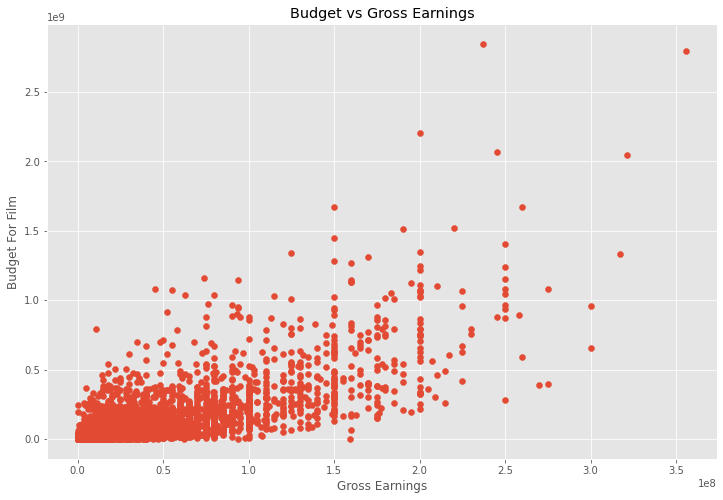

In [73]:
#Scatter plot with budget and gross 
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')

plt.show()

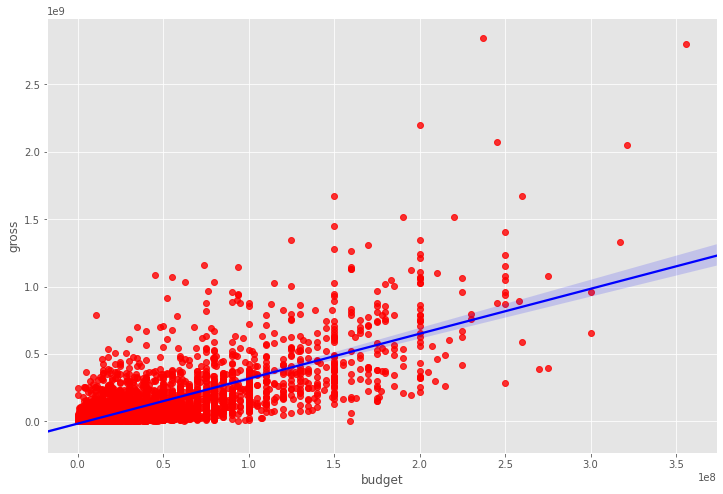

In [79]:
# Plot budget vs gross using seaborn
sns.regplot(x=df['budget'],y=df['gross'],data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [81]:
#Let's start looking at correlation
df.corr(method='pearson')#pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [82]:
#High correlation between budget and gross 


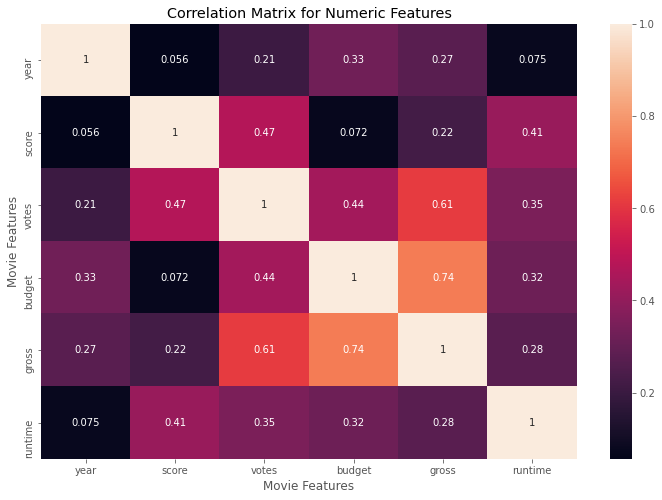

In [90]:
corr_matrix=df.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [113]:
df_numerized = df 
for col_name in df.numerized.columns:
    if(df.numerized[col_name].dtype=='object'):
        df.numerized[col_name]= df.numerized[col_name].astype('category')
        df.numerized[col_name]= df.numerized[col_name].cat.codes
df.numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,39
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,17
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,38
7480,4388,4,2,2019,1126,6.9,222000,1012,1361,457,47,260000000,1670727580,1423,118.0,39
6653,2117,5,0,2015,1303,7.0,593000,335,2523,293,47,150000000,1670516444,1397,124.0,35
6043,3878,5,0,2012,1899,8.0,1300000,1060,1646,1470,47,220000000,1518815515,983,143.0,32
6646,1541,5,0,2015,165,7.1,370000,809,481,1785,47,190000000,1515341399,1397,137.0,35
7494,1530,4,2,2019,2053,6.8,148000,277,1383,1036,47,150000000,1450026933,1422,103.0,39


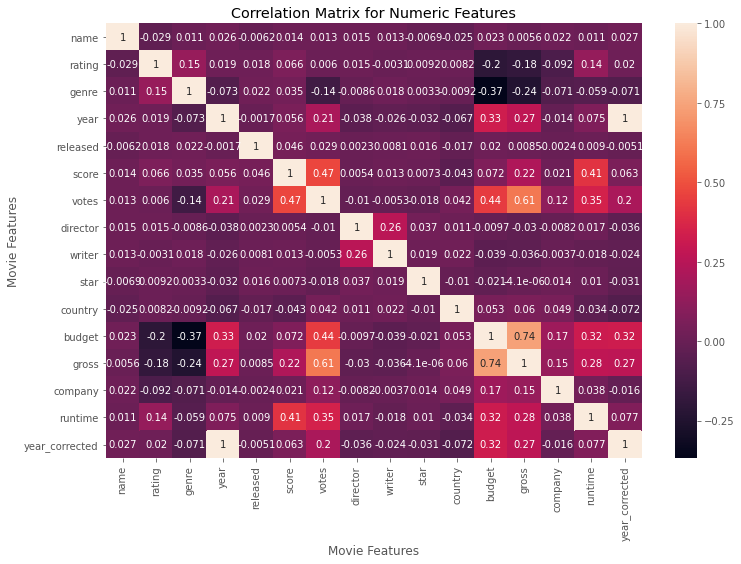

In [104]:
corr_matrix=df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [106]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name            name              1.000000
                rating           -0.029234
                genre             0.010996
                year              0.025542
                released         -0.006152
                score             0.014450
                votes             0.012615
                director          0.015246
                writer            0.012880
                star             -0.006882
                country          -0.025490
                budget            0.023392
                gross             0.005639
                company           0.021697
                runtime           0.010850
                year_corrected    0.026759
rating          name             -0.029234
                rating            1.000000
                genre             0.147796
                year              0.019499
                released          0.018083
                score             0.065983
                votes             0.006031
           

In [107]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre           budget           -0.368523
budget          genre            -0.368523
gross           genre            -0.244101
genre           gross            -0.244101
rating          budget           -0.203946
budget          rating           -0.203946
rating          gross            -0.181906
gross           rating           -0.181906
votes           genre            -0.135990
genre           votes            -0.135990
company         rating           -0.092357
rating          company          -0.092357
year            genre            -0.073167
genre           year             -0.073167
country         year_corrected   -0.072407
year_corrected  country          -0.072407
company         genre            -0.071334
genre           company          -0.071334
year_corrected  genre            -0.070699
genre           year_corrected   -0.070699
year            country          -0.066748
country         year             -0.066748
runtime         genre            -0.059237
genre      

In [111]:
high_correlation=sorted_pairs[(sorted_pairs)>0.5]
high_correlation

votes           gross             0.614751
gross           votes             0.614751
                budget            0.740247
budget          gross             0.740247
year_corrected  year              0.996723
year            year_corrected    0.996723
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
dtype: float64

In [ ]:
#Votes and Budget have the highest correlation to gross earnings
#Company has low correlation to gross earnings